# Neural Network, Classification

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state = 4)
y_D2 = y_D2 % 2

<IPython.core.display.Javascript object>


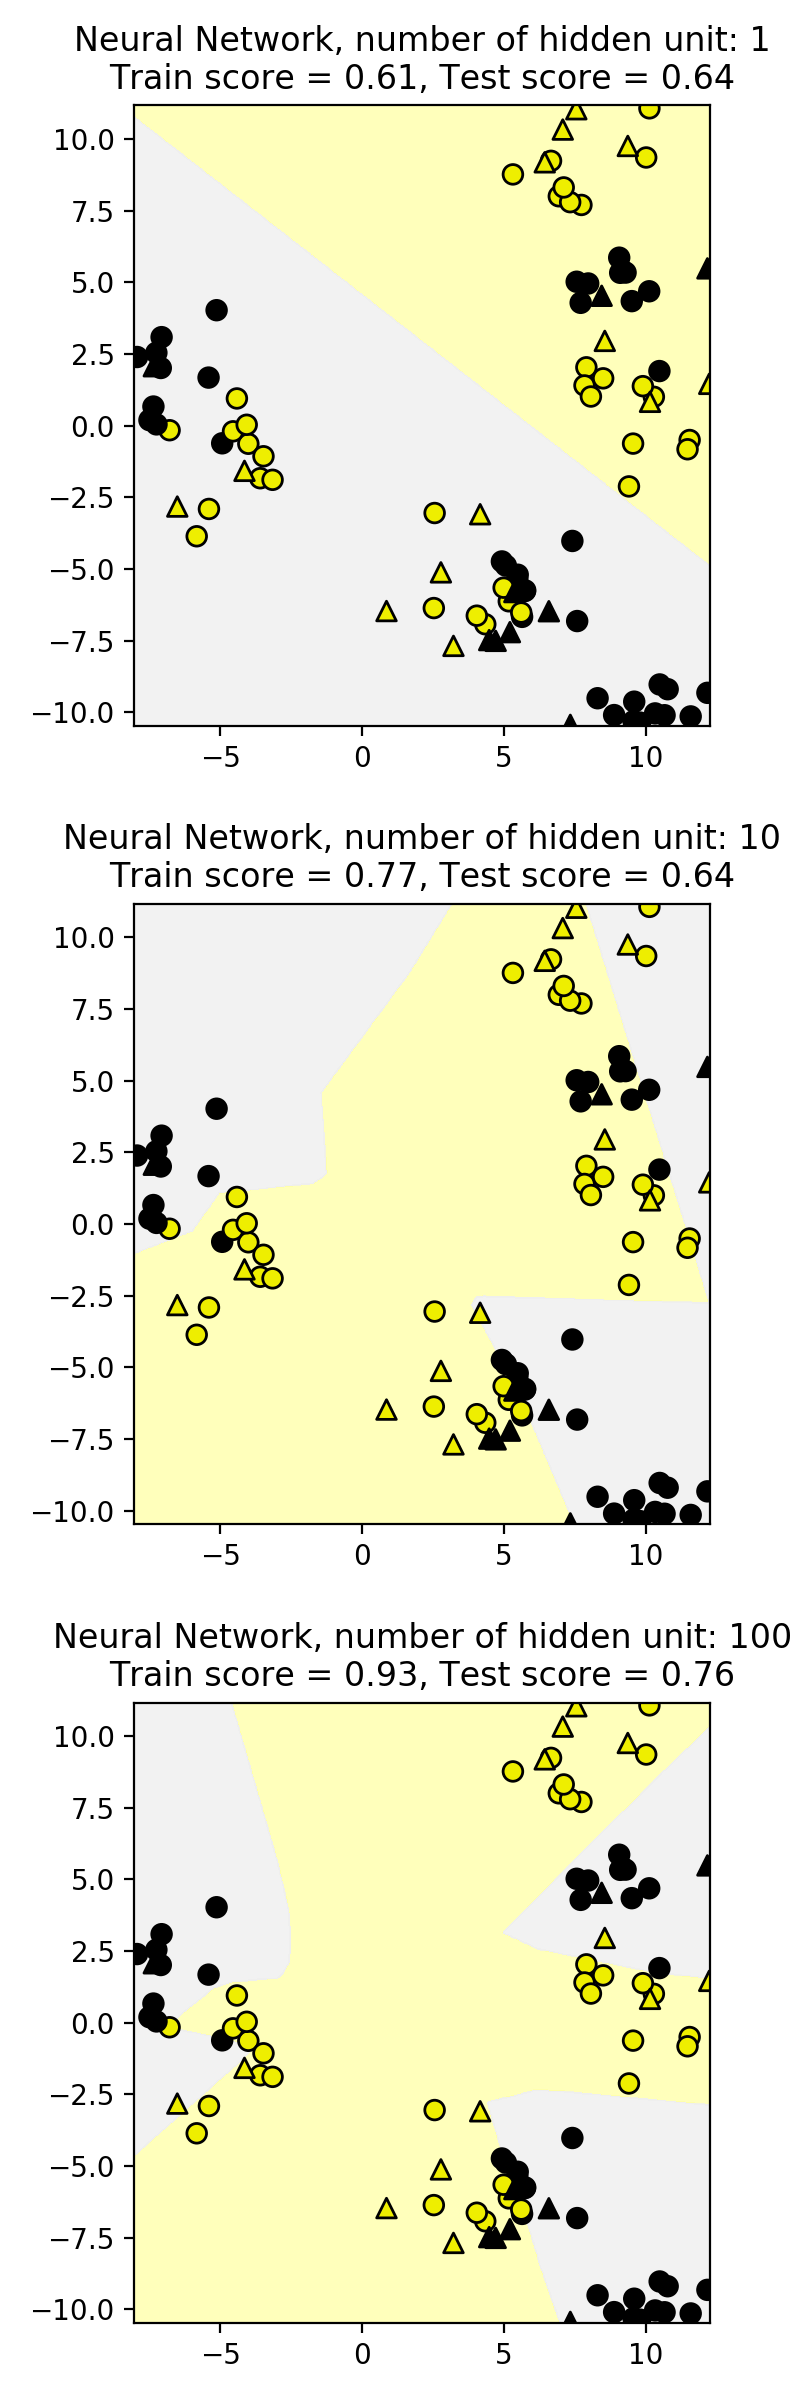

In [10]:
%matplotlib notebook
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
units = [1, 10, 100]
fig, subaxes = plt.subplots(3,1, figsize = (4, 12))
for i, axis in zip(units, subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes=[i],solver='lbfgs', random_state = 0 ).fit(X_train, y_train)
    title = 'Neural Network, number of hidden unit: {:.0f}'.format(i)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test,title,axis)
plt.tight_layout(h_pad=2)

### Two Hidden Layers

MLP train accuracy score: 0.92
MLP test accuracy score: 0.76


<IPython.core.display.Javascript object>


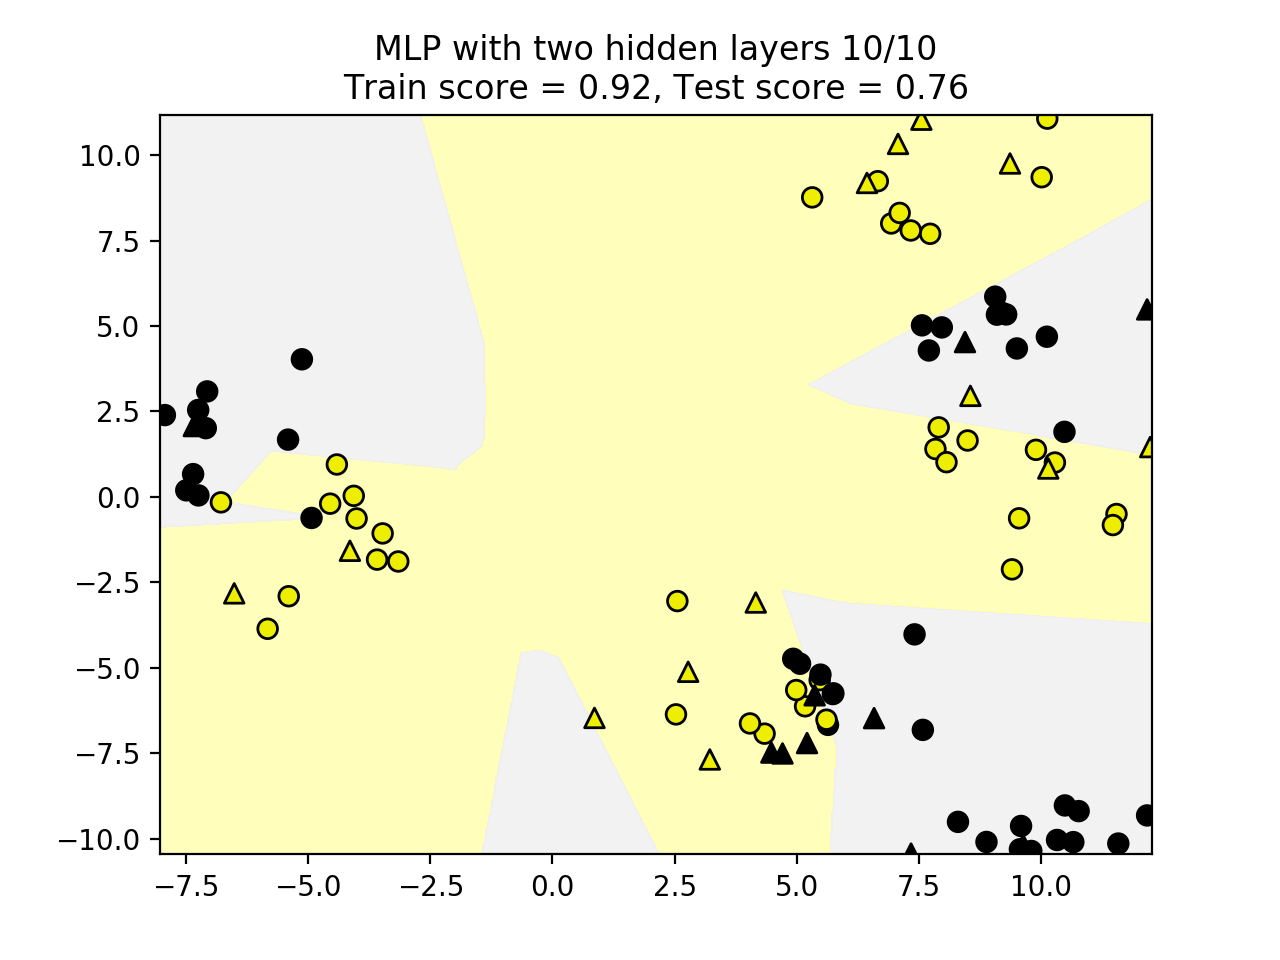

In [21]:
from adspy_shared_utilities import plot_class_regions_for_classifier
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], solver='lbfgs', random_state= 0).fit(X_train, y_train)
print('MLP train accuracy score: {:.2f}'.format(nnclf.score(X_train, y_train)))
print('MLP test accuracy score: {:.2f}'.format(nnclf.score(X_test, y_test)))
plot_class_regions_for_classifier(nnclf, X_train, y_train, X_test, y_test, 'MLP with two hidden layers 10/10')

### Regularization Parameter Alpha 

In [1]:
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

Neural Network accuracy score on train set: 0.96
Neural Network accuracy score on test set: 0.76
Neural Network accuracy score on train set: 0.93
Neural Network accuracy score on test set: 0.76
Neural Network accuracy score on train set: 0.92
Neural Network accuracy score on test set: 0.76
Neural Network accuracy score on train set: 0.88
Neural Network accuracy score on test set: 0.84


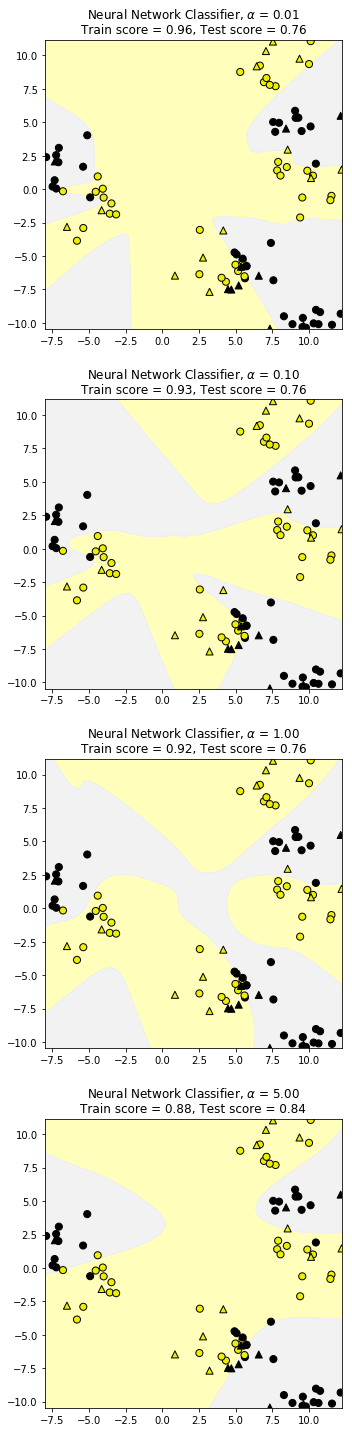

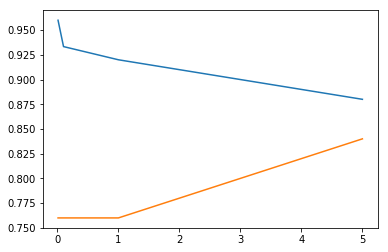

In [15]:
X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state = 4)
y_copy = y_D2.copy()
y_D2 = y_D2 % 2
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
alpha_list = [0.01, 0.1, 1.0, 5]
fig, subaxes = plt.subplots(4,1, figsize = (5, 20))
y1_alpha = []
y2_alpha = []
for alpha, axis in zip(alpha_list, subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes=[10,10], solver='lbfgs', activation='tanh', alpha=alpha, random_state=0)
    nnclf.fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, 
                                              r'Neural Network Classifier, $\alpha$ = {:.2f}'.format(alpha), axis)
    plt.tight_layout(h_pad=2)
    y1_alpha.append(nnclf.score(X_train, y_train))
    y2_alpha.append(nnclf.score(X_test, y_test))
    print('Neural Network accuracy score on train set: {:.2f}'.format(nnclf.score(X_train, y_train)))
    print('Neural Network accuracy score on test set: {:.2f}'.format(nnclf.score(X_test, y_test)))
plt.figure(2)
plt.plot(alpha_list, y1_alpha, alpha_list, y2_alpha)

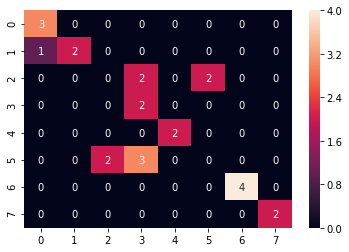

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_copy, random_state = 0)
nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], activation='tanh', alpha=0.0, random_state = 0, solver=
                     'lbfgs')
nnclf.fit(X_train, y_train)
nnclf_y_prediction =  nnclf.predict(X_test)
confusion = confusion_matrix(y_test, nnclf_y_prediction)
df = pd.DataFrame(confusion, index = [i  for i in range(0, 8, 1)], columns=[i for i in range(0, 8, 1)])
sns.heatmap(df, annot=True)

### The Effect of Different Choices of Activation Function

<IPython.core.display.Javascript object>


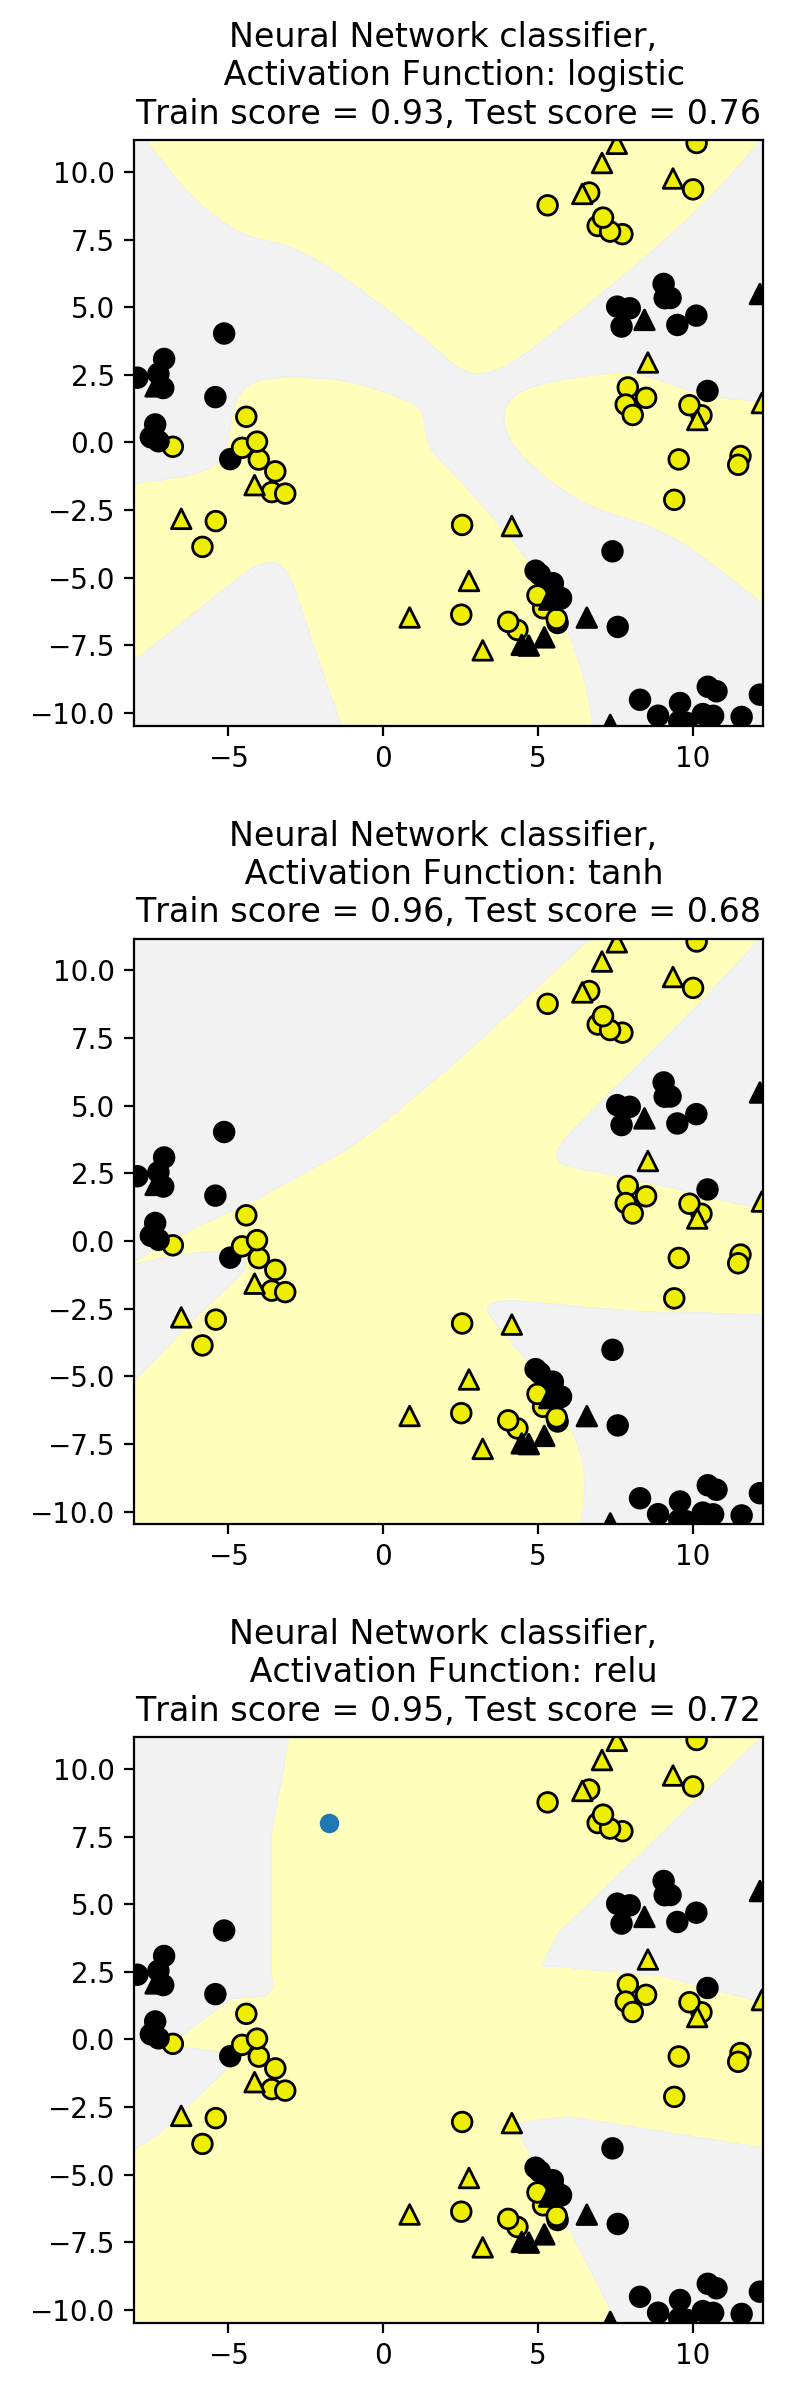

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

X_D2, y_D2 = make_blobs(n_samples=100, n_features=2, centers=8, cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
activation_function_list = ['logistic', 'tanh', 'relu']
fig, subaxes = plt.subplots(3,1, figsize = (4, 12))
for ac_fun, axis in zip(activation_function_list, subaxes):
    nnclf = MLPClassifier(hidden_layer_sizes=[10, 10], activation= ac_fun, alpha=0.1, random_state=4, 
                         solver = 'lbfgs')
    nnclf.fit(X_train, y_train)
    plot_class_regions_for_classifier_subplot(nnclf, X_train, y_train, X_test, y_test, 
                                              'Neural Network classifier, \n Activation Function: ' + ac_fun, axis)
plt.tight_layout(h_pad=2)

# Neural Network Regression

<IPython.core.display.Javascript object>


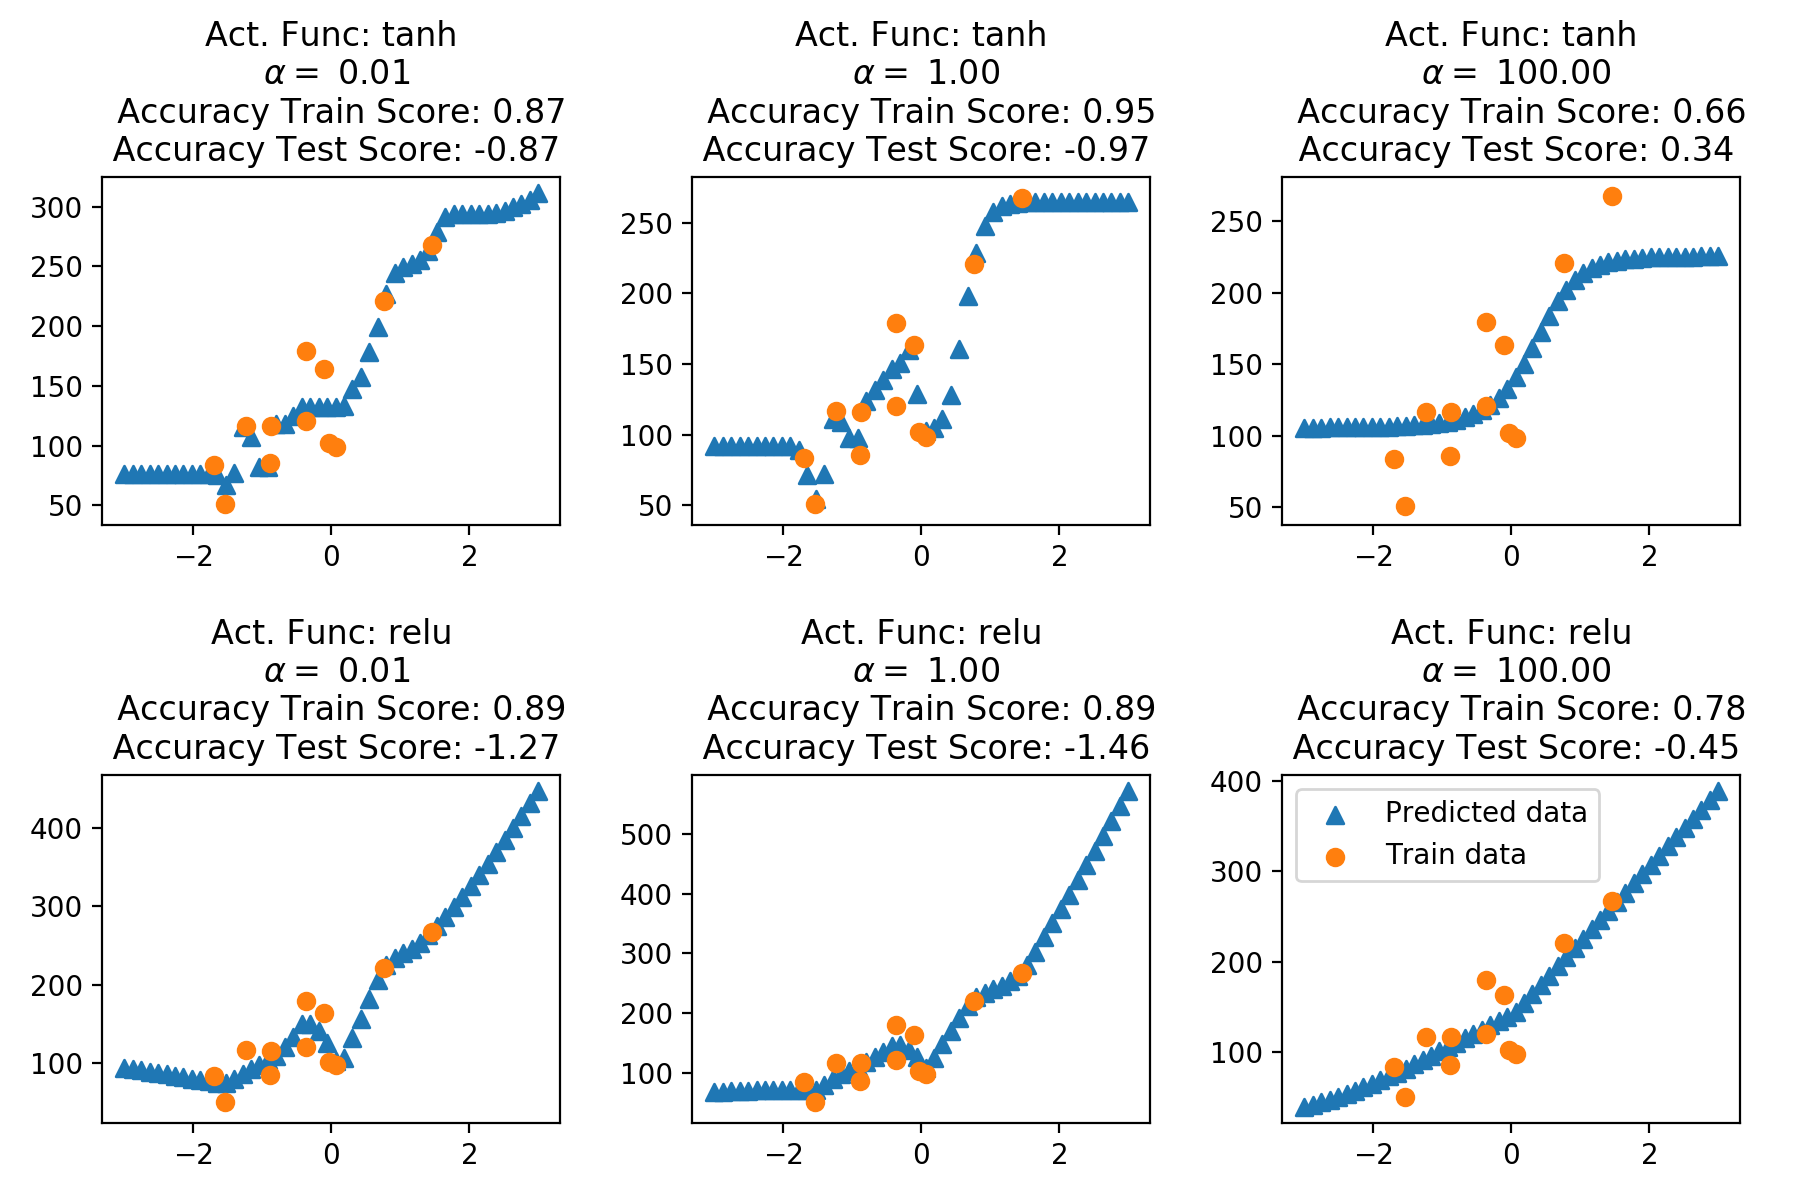

In [99]:
%matplotlib notebook
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150,
                            noise=30, random_state=0)

X_input = np.linspace(-3, 3, 50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::6], y_R1[0::6], random_state = 0)

fig, subaxes = plt.subplots(2, 3, figsize = (9, 6))
for i, act_func in zip([0, 1], ['tanh', 'relu']):
    for j, alpha in zip([0, 1, 2], [0.01, 1, 100]):
        mlpreg = MLPRegressor(hidden_layer_sizes=[100, 100], activation=act_func, alpha=alpha, random_state=0, 
                      solver='lbfgs')
        mlpreg.fit(X_train, y_train)
        mlpreg_y_prediction = mlpreg.predict(X_input)
        subaxes[i, j].scatter(X_input, mlpreg_y_prediction, label = 'Predicted data', marker = '^')
        subaxes[i, j].scatter(X_train, y_train, label = 'Train data', marker = 'o')
        subaxes[i, j].set_title('Act. Func: ' + act_func + '\n ' +  r'$\alpha = $ {:.2f}'.format(alpha) +
                                '\n  Accuracy Train Score: {:.2f}'.format(mlpreg.score(X_train, y_train)) + '\n ' +
                               'Accuracy Test Score: {:.2f}'.format(mlpreg.score(X_test, y_test)) )

plt.legend()
plt.tight_layout(h_pad=2)

### Neural Network Application to Real-world Dataset For Classification 

In [126]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier 

scaler = MinMaxScaler()
scaled = False

(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
nnclf = MLPClassifier(hidden_layer_sizes=[4], activation='logistic', solver='lbfgs', random_state=0, alpha=5)

nnclf.fit(X_train_scaled, y_train)
print('Accuracy score on train set (scaled set): {:.2f}'.format(nnclf.score(X_train_scaled, y_train)))
print('Accuracy score on test set (scaled set): {:.2f}'.format(nnclf.score(X_test_scaled, y_test)))

nnclf.fit(X_train, y_train)
print('Accuracy score on train set: {:.2f}'.format(nnclf.score(X_train, y_train)))
print('Accuracy score on test set: {:.2f}'.format(nnclf.score(X_test, y_test)))

Accuracy score on train set (scaled set): 0.95
Accuracy score on test set (scaled set): 0.95
Accuracy score on train set: 0.93
Accuracy score on test set: 0.89


(569,)